# Person and Car Detection (from YOLOv8 to YOLO11)
### Object Detection
The purpose of Object Detection is to locate objects in images. It is a part of artificial intelligence in the scope of enabling computers 'to see' as people do.

The idea is composed of 2 parts:
* Object localization which helps with aproximately defining the location of an object, by demarcating the object with a box;
* Object classification which is determinating which type of object it is, based on the input classes.[[IBM]]

### YOLO (You only look once)

You only look once (YOLO) is a state-of-the-art, real-time object detection system.[[YOLOpage]]

Before YOLO, the idea of object detection was taking an existing classifier and making it perform detection, evaluating it in multiple locations of a given test image. The problem with this approach is that it is not fast. A solution proposed to solve this is 'R-CNN' which uses regional proposal which splits a given image into potential regions which contain the specified object.[[YOLOpaper]]

Within this notebook there will be presented also an analysis between the accuracy of YOLO models obtained from ultralytics python library.

Due to the fast response & the big dataset (over 3500 images), the analysis will be made with the fastest subversions, even if this means that they are the lowest accuracy.

Subversions used:
* [[YOLOv8n]]
* [[YOLOv9t]]
* [[YOLOv10n]]
* [[YOLO11n]]


[IBM]: https://www.ibm.com/think/topics/object-detection
[YOLOpage]: https://pjreddie.com/darknet/yolo/
[YOLOpaper]: https://www.cv-foundation.org/openaccess/content_cvpr_2016/papers/Redmon_You_Only_Look_CVPR_2016_paper.pdf
[YOLOv8n]: https://docs.ultralytics.com/models/yolov8/
[YOLOv9t]: https://docs.ultralytics.com/models/yolov9/
[YOLOv10n]: https://docs.ultralytics.com/models/yolov10/
[YOLO11n]: https://docs.ultralytics.com/models/yolo11/

### Importing libraries

In [3]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 906.8/906.8 kB 19.8 MB/s eta 0:00:0000:01


In [4]:
# Import necessary libraries
import os
import cv2
import random
import numpy as np
import pandas as pd
from PIL import Image
from ultralytics import YOLO
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import HTML
# Suppress warnings for cleaner outputs
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


### Defining dataset configuration yaml for model training
The data paths are under 'test', 'train' and 'val' properties.

The number of classes is defined under the 'nc' property.

The name of the classes found in the dataset under the 'names' property.

In [5]:
# Define paths for train, validation, and test image datasets
train_path = '/kaggle/input/car-person-object-detection-yolov7/images/train'
val_path = '/kaggle/input/car-person-object-detection-yolov7/images/val'
test_path = '/kaggle/input/car-person-object-detection-yolov7/images/test'
# Dynamically generate a YAML configuration file for YOLOv8 training
yaml_content = f"""
test: {test_path}
train: {train_path}
val: {val_path}

nc: 2
names: ['Person', 'Car']
"""
data_config_path = 'data.yaml'
with open(data_config_path, 'w') as file:
    file.write(yaml_content)

### Dataset

In [6]:
print(str(len(os.listdir(train_path))) + " images in the training dataset")
print(str(len(os.listdir(val_path))) + " images in the validation dataset")
print(str(len(os.listdir(test_path))) + " images in the test dataset")

3500 images in the training dataset
1000 images in the validation dataset
500 images in the test dataset


### Displaying a sample of the images found in the training dataset

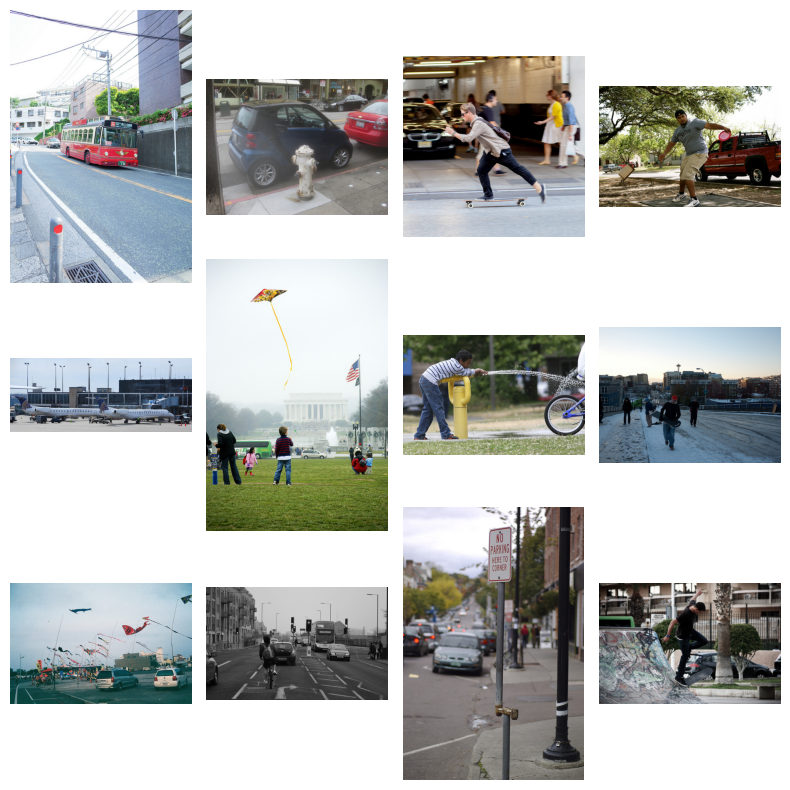

In [14]:
image_files = [f for f in os.listdir(train_path) if f.endswith(('.jpg'))]
selected_images = random.sample(image_files, 12)
fig, axes = plt.subplots(3, 4, figsize=(8, 8))
for i, ax in enumerate(axes.flat):
    img_path = os.path.join(train_path, selected_images[i])
    img = mpimg.imread(img_path)
    ax.imshow(img)
    ax.axis('off')
plt.tight_layout()
plt.show()

In [6]:
# Download and load the YOLOv8n model
yolov8x_model = YOLO('yolov8n.pt')
yolov8x_model.train(
    name='yolov8n', # Run name
    data=data_config_path,  # Path to the YAML config
    epochs=50,  # Train for 50 epochs
    imgsz=416,  # Image size for training
    batch=8,  # Batch size
    dropout=0.2, # Dropout rate
)

100%|██████████| 6.25M/6.25M [00:00<00:00, 117MB/s]


Ultralytics 8.3.59 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=data.yaml, epochs=50, time=None, patience=100, batch=8, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov8n, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.2, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=Tru

100%|██████████| 755k/755k [00:00<00:00, 22.9MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 92.2MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/input/car-person-object-detection-yolov7/labels/train... 3500 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3500/3500 [00:11<00:00, 306.62it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/car-person-object-detection-yolov7/labels is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/input/car-person-object-detection-yolov7/labels/val... 1000 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1000/1000 [00:02<00:00, 343.93it/s]


val: WARNING ⚠️ Cache directory /kaggle/input/car-person-object-detection-yolov7/labels is not writeable, cache not saved.
Plotting labels to runs/detect/yolov8n/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 416 train, 416 val
Using 4 dataloader workers
Logging results to runs/detect/yolov8n
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50     0.633G      1.671      1.752       1.26        127        416: 100%|██████████| 438/438 [00:44<00:00,  9.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.83it/s]


                   all       1000       8980      0.542      0.337      0.358       0.19

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      0.64G      1.787      1.595      1.334         23        416: 100%|██████████| 438/438 [00:40<00:00, 10.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 11.08it/s]


                   all       1000       8980      0.533      0.339       0.36       0.18

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      0.64G      1.832      1.622      1.369         18        416: 100%|██████████| 438/438 [00:40<00:00, 10.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 11.70it/s]


                   all       1000       8980      0.519       0.34      0.368      0.184

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50     0.631G      1.816      1.578      1.363         62        416: 100%|██████████| 438/438 [00:39<00:00, 11.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 11.86it/s]


                   all       1000       8980      0.556      0.361      0.385      0.199

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50     0.646G      1.786      1.544      1.349         38        416: 100%|██████████| 438/438 [00:40<00:00, 10.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 11.83it/s]


                   all       1000       8980      0.542      0.361      0.381      0.202

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50     0.638G      1.764      1.495      1.327         64        416: 100%|██████████| 438/438 [00:39<00:00, 10.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 11.81it/s]


                   all       1000       8980      0.569       0.38      0.408      0.214

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50     0.621G      1.727      1.477      1.319         41        416: 100%|██████████| 438/438 [00:40<00:00, 10.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 11.96it/s]


                   all       1000       8980        0.6      0.374      0.414      0.223

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50     0.635G      1.719      1.454       1.31         39        416: 100%|██████████| 438/438 [00:39<00:00, 10.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 12.04it/s]


                   all       1000       8980      0.571      0.373      0.407      0.217

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50     0.646G      1.714      1.429      1.312         50        416: 100%|██████████| 438/438 [00:40<00:00, 10.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 11.85it/s]


                   all       1000       8980      0.592      0.395       0.43      0.227

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50     0.612G      1.673      1.388      1.289         96        416: 100%|██████████| 438/438 [00:39<00:00, 10.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 11.95it/s]


                   all       1000       8980      0.604      0.393      0.437      0.237

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      0.64G      1.675      1.379      1.286         44        416: 100%|██████████| 438/438 [00:40<00:00, 10.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 11.21it/s]


                   all       1000       8980      0.585      0.403      0.433      0.234

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50     0.617G      1.659      1.361      1.283         71        416: 100%|██████████| 438/438 [00:39<00:00, 11.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 12.26it/s]


                   all       1000       8980      0.613      0.394      0.443      0.242

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50     0.642G      1.644      1.356      1.273         34        416: 100%|██████████| 438/438 [00:39<00:00, 11.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 12.17it/s]


                   all       1000       8980      0.605      0.411       0.45      0.244

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50     0.644G      1.646      1.342      1.267         62        416: 100%|██████████| 438/438 [00:39<00:00, 11.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 12.17it/s]


                   all       1000       8980      0.619      0.414      0.461      0.248

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      0.64G      1.622       1.32      1.252         51        416: 100%|██████████| 438/438 [00:39<00:00, 11.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 11.74it/s]

                   all       1000       8980       0.63      0.416      0.463      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50     0.631G      1.618      1.297      1.256         43        416: 100%|██████████| 438/438 [00:39<00:00, 11.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 12.04it/s]


                   all       1000       8980      0.616      0.416      0.462      0.254

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50     0.608G      1.599      1.303      1.255         68        416: 100%|██████████| 438/438 [00:39<00:00, 11.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 11.83it/s]


                   all       1000       8980      0.619      0.426      0.464      0.256

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50     0.612G      1.588      1.281      1.245         65        416: 100%|██████████| 438/438 [00:39<00:00, 11.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 11.74it/s]


                   all       1000       8980       0.64      0.426      0.474      0.262

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50     0.638G      1.589      1.274      1.242         60        416: 100%|██████████| 438/438 [00:39<00:00, 11.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 12.27it/s]


                   all       1000       8980      0.638      0.429      0.478      0.266

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50     0.635G      1.562      1.238      1.228         25        416: 100%|██████████| 438/438 [00:39<00:00, 11.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 12.36it/s]


                   all       1000       8980      0.633      0.429       0.48      0.265

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      0.64G      1.561      1.245      1.225         65        416: 100%|██████████| 438/438 [00:39<00:00, 11.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 12.21it/s]


                   all       1000       8980      0.635      0.429      0.476      0.266

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50     0.625G      1.557      1.228      1.221         35        416: 100%|██████████| 438/438 [00:39<00:00, 11.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 12.30it/s]

                   all       1000       8980      0.642      0.441      0.491      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50     0.621G      1.549      1.223      1.225         77        416: 100%|██████████| 438/438 [00:40<00:00, 10.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 11.39it/s]


                   all       1000       8980      0.645      0.441      0.491      0.273

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50     0.614G      1.553      1.219      1.222         70        416: 100%|██████████| 438/438 [00:40<00:00, 10.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 11.30it/s]


                   all       1000       8980      0.644      0.433       0.49      0.273

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50     0.621G      1.541      1.198      1.211        113        416: 100%|██████████| 438/438 [00:40<00:00, 10.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 12.40it/s]

                   all       1000       8980      0.642      0.438      0.486      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      0.64G      1.531      1.198       1.21         43        416: 100%|██████████| 438/438 [00:39<00:00, 11.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 12.36it/s]

                   all       1000       8980      0.632      0.444       0.49      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      0.61G      1.516      1.188      1.206         57        416: 100%|██████████| 438/438 [00:39<00:00, 11.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 11.31it/s]

                   all       1000       8980      0.648      0.439      0.494      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50     0.608G      1.509      1.171      1.197         47        416: 100%|██████████| 438/438 [00:39<00:00, 11.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 12.10it/s]


                   all       1000       8980      0.662      0.449      0.502      0.284

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50     0.617G      1.505      1.173      1.195         61        416: 100%|██████████| 438/438 [00:39<00:00, 11.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 12.00it/s]


                   all       1000       8980      0.663      0.443      0.502      0.286

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50     0.642G      1.504      1.167      1.193         49        416: 100%|██████████| 438/438 [00:39<00:00, 10.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 12.26it/s]


                   all       1000       8980       0.64      0.452      0.501      0.287

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      0.64G      1.493       1.15      1.186         60        416: 100%|██████████| 438/438 [00:39<00:00, 11.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 12.25it/s]


                   all       1000       8980      0.656      0.451      0.503      0.285

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50     0.633G      1.488      1.143      1.187         49        416: 100%|██████████| 438/438 [00:39<00:00, 11.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 12.38it/s]

                   all       1000       8980       0.65       0.45      0.506      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50     0.646G       1.48      1.137      1.183         37        416: 100%|██████████| 438/438 [00:39<00:00, 11.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 12.47it/s]

                   all       1000       8980      0.645      0.452      0.503      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50     0.619G      1.456      1.116      1.175         39        416: 100%|██████████| 438/438 [00:39<00:00, 11.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 11.80it/s]

                   all       1000       8980      0.658      0.454      0.512      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50     0.619G      1.468      1.119       1.18         40        416: 100%|██████████| 438/438 [00:38<00:00, 11.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 12.09it/s]

                   all       1000       8980      0.644       0.46      0.512      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50     0.631G       1.46      1.119      1.171         52        416: 100%|██████████| 438/438 [00:38<00:00, 11.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 12.37it/s]

                   all       1000       8980       0.66      0.455      0.511      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50     0.642G      1.442       1.09      1.161         94        416: 100%|██████████| 438/438 [00:39<00:00, 11.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 12.31it/s]

                   all       1000       8980      0.654      0.462      0.512      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50     0.638G      1.448      1.098      1.164         40        416: 100%|██████████| 438/438 [00:39<00:00, 11.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 12.48it/s]

                   all       1000       8980      0.648      0.461      0.514      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50     0.614G      1.433      1.081      1.158         80        416: 100%|██████████| 438/438 [00:39<00:00, 11.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 11.92it/s]


                   all       1000       8980      0.671      0.461      0.521      0.298

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50     0.633G      1.437      1.077      1.157        123        416: 100%|██████████| 438/438 [00:39<00:00, 11.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 12.40it/s]

                   all       1000       8980      0.656      0.466       0.52      0.297


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50     0.625G      1.425       1.04      1.141         26        416: 100%|██████████| 438/438 [00:39<00:00, 11.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 12.29it/s]


                   all       1000       8980      0.667      0.458      0.518      0.297

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50     0.625G      1.414       1.02      1.134         36        416: 100%|██████████| 438/438 [00:38<00:00, 11.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 12.34it/s]

                   all       1000       8980      0.669      0.462      0.522      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50     0.625G      1.399      1.001      1.127         49        416: 100%|██████████| 438/438 [00:38<00:00, 11.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 12.26it/s]

                   all       1000       8980      0.673      0.463      0.523      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50     0.619G      1.387     0.9914      1.119         22        416: 100%|██████████| 438/438 [00:38<00:00, 11.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 11.97it/s]

                   all       1000       8980      0.674      0.463      0.523        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50     0.619G       1.38     0.9794      1.116         45        416: 100%|██████████| 438/438 [00:39<00:00, 11.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 11.69it/s]

                   all       1000       8980      0.675      0.461      0.524      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50     0.623G      1.372     0.9744      1.114         27        416: 100%|██████████| 438/438 [00:39<00:00, 11.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 11.72it/s]


                   all       1000       8980      0.669      0.465      0.524      0.303

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50     0.623G      1.366     0.9609      1.108         42        416: 100%|██████████| 438/438 [00:39<00:00, 11.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 12.16it/s]

                   all       1000       8980      0.671      0.473      0.526      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50     0.619G      1.363     0.9633      1.106         25        416: 100%|██████████| 438/438 [00:39<00:00, 11.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 12.35it/s]

                   all       1000       8980      0.673      0.468      0.527      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50     0.621G      1.346     0.9441      1.102         22        416: 100%|██████████| 438/438 [00:39<00:00, 11.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 12.09it/s]

                   all       1000       8980      0.686      0.466      0.528      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50     0.623G      1.347      0.945        1.1         48        416: 100%|██████████| 438/438 [00:39<00:00, 11.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 12.19it/s]

                   all       1000       8980       0.68       0.47      0.529      0.306



50 epochs completed in 0.635 hours.
Optimizer stripped from runs/detect/yolov8n/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/yolov8n/weights/best.pt, 6.2MB

Validating runs/detect/yolov8n/weights/best.pt...
Ultralytics 8.3.59 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 168 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:06<00:00,  9.05it/s]


                   all       1000       8980       0.68       0.47      0.529      0.306
                Person       1000       5292      0.716      0.467      0.542      0.309
                   Car       1000       3688      0.644      0.473      0.515      0.303
Speed: 0.1ms preprocess, 0.9ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/yolov8n


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x79fabd2d76a0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [8]:
# Download and load the YOLOv9t model
yolov9t_model = YOLO('yolov9t.pt')
yolov9t_model.train(
    name='yolov9t', # Run name
    data=data_config_path,  # Path to the YAML config
    epochs=50,  # Train for 50 epochs
    imgsz=416,  # Image size for training
    batch=8,  # Batch size
    dropout=0.2, # Dropout rate
)

Ultralytics 8.3.59 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=yolov9t.pt, data=data.yaml, epochs=50, time=None, patience=100, batch=8, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov9t, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.2, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=Tru

100%|██████████| 755k/755k [00:00<00:00, 47.8MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7872  ultralytics.nn.modules.block.ELAN1           [32, 32, 32, 16]              
  3                  -1  1     18560  ultralytics.nn.modules.block.AConv           [32, 64]                      
  4                  -1  1     65216  ultralytics.nn.modules.block.RepNCSPELAN4    [64, 64, 64, 32, 3]           
  5                  -1  1     55488  ultralytics.nn.modules.block.AConv           [64, 96]                      
  6                  -1  1    145824  ultralytics.nn.modules.block.RepNCSPELAN4    [96, 96, 96, 48, 3]           
  7                  -1  1    110848  ultralytics

train: Scanning /kaggle/input/car-person-object-detection-yolov7/labels/train... 3500 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3500/3500 [00:10<00:00, 331.25it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/car-person-object-detection-yolov7/labels is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/input/car-person-object-detection-yolov7/labels/val... 1000 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1000/1000 [00:02<00:00, 353.70it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/car-person-object-detection-yolov7/labels is not writeable, cache not saved.


Plotting labels to runs/detect/yolov9t/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 221 weight(decay=0.0), 228 weight(decay=0.0005), 227 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 416 train, 416 val
Using 4 dataloader workers
Logging results to runs/detect/yolov9t
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50     0.736G      1.637      1.719      1.311        127        416: 100%|██████████| 438/438 [01:39<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:08<00:00,  7.08it/s]


                   all       1000       8980      0.552      0.373      0.378      0.196

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50     0.751G      1.742       1.54      1.388         23        416: 100%|██████████| 438/438 [01:31<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.89it/s]


                   all       1000       8980      0.543      0.334      0.356      0.175

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50     0.753G      1.798      1.586      1.427         18        416: 100%|██████████| 438/438 [01:28<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:06<00:00,  9.02it/s]


                   all       1000       8980      0.566      0.366      0.391        0.2

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      0.74G      1.781      1.547      1.426         62        416: 100%|██████████| 438/438 [01:28<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.98it/s]


                   all       1000       8980      0.513      0.349      0.362      0.188

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50     0.749G      1.756      1.501       1.41         38        416: 100%|██████████| 438/438 [01:28<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:06<00:00,  9.17it/s]


                   all       1000       8980      0.515      0.336      0.349      0.185

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50     0.755G      1.736      1.454      1.394         64        416: 100%|██████████| 438/438 [01:28<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:06<00:00,  9.22it/s]


                   all       1000       8980      0.585      0.374      0.407      0.214

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50     0.724G      1.713      1.448      1.386         41        416: 100%|██████████| 438/438 [01:28<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:06<00:00,  9.02it/s]

                   all       1000       8980      0.584      0.378       0.41      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50     0.747G      1.695      1.417      1.374         39        416: 100%|██████████| 438/438 [01:28<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.77it/s]

                   all       1000       8980       0.59      0.372      0.414      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50     0.744G      1.677      1.398      1.366         50        416: 100%|██████████| 438/438 [01:27<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.87it/s]


                   all       1000       8980       0.58      0.393      0.424      0.232

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50     0.717G      1.647      1.353      1.349         96        416: 100%|██████████| 438/438 [01:27<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.85it/s]


                   all       1000       8980      0.614      0.405      0.445      0.246

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50     0.747G      1.645      1.346      1.351         44        416: 100%|██████████| 438/438 [01:28<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.63it/s]


                   all       1000       8980      0.597      0.415      0.448      0.244

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50     0.728G      1.638      1.329      1.347         71        416: 100%|██████████| 438/438 [01:28<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:06<00:00,  9.03it/s]


                   all       1000       8980      0.611        0.4      0.449      0.248

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50     0.755G      1.624      1.326      1.335         34        416: 100%|██████████| 438/438 [01:27<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.82it/s]


                   all       1000       8980      0.611      0.418      0.458      0.252

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50     0.747G      1.623      1.311      1.329         62        416: 100%|██████████| 438/438 [01:28<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.74it/s]


                   all       1000       8980      0.631      0.408      0.457      0.248

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50     0.744G      1.596      1.285      1.314         51        416: 100%|██████████| 438/438 [01:28<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:06<00:00,  9.05it/s]


                   all       1000       8980      0.613      0.404       0.45      0.251

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      0.74G      1.594      1.273      1.321         43        416: 100%|██████████| 438/438 [01:27<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.88it/s]


                   all       1000       8980      0.616      0.424      0.466      0.259

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50     0.728G      1.579      1.261       1.31         68        416: 100%|██████████| 438/438 [01:28<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.84it/s]


                   all       1000       8980      0.615      0.423      0.465      0.258

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50     0.721G      1.569      1.248      1.303         65        416: 100%|██████████| 438/438 [01:28<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:06<00:00,  9.13it/s]


                   all       1000       8980      0.628      0.433      0.476      0.266

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50     0.742G      1.561      1.247      1.301         60        416: 100%|██████████| 438/438 [01:27<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:06<00:00,  9.13it/s]


                   all       1000       8980      0.628      0.425       0.47      0.258

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50     0.747G      1.545      1.208      1.293         25        416: 100%|██████████| 438/438 [01:28<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:06<00:00,  9.16it/s]


                   all       1000       8980      0.628      0.422      0.474      0.266

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50     0.744G      1.533       1.21      1.282         65        416: 100%|██████████| 438/438 [01:28<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:06<00:00,  9.39it/s]


                   all       1000       8980      0.639      0.419      0.469      0.264

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50     0.726G      1.538      1.198       1.28         35        416: 100%|██████████| 438/438 [01:28<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.85it/s]


                   all       1000       8980      0.636      0.436      0.482       0.27

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      0.73G      1.533      1.194      1.284         77        416: 100%|██████████| 438/438 [01:28<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.89it/s]


                   all       1000       8980      0.638      0.433      0.483       0.27

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50     0.726G      1.527      1.182       1.28         70        416: 100%|██████████| 438/438 [01:29<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:06<00:00,  9.01it/s]


                   all       1000       8980      0.637       0.43      0.488      0.273

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50     0.726G      1.519      1.171      1.272        113        416: 100%|██████████| 438/438 [01:29<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:06<00:00,  9.03it/s]


                   all       1000       8980      0.645      0.435      0.492      0.281

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      0.74G      1.505      1.168      1.273         43        416: 100%|██████████| 438/438 [01:29<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:06<00:00,  9.06it/s]


                   all       1000       8980      0.639       0.44      0.488      0.276

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50     0.717G      1.498      1.159      1.268         57        416: 100%|██████████| 438/438 [01:29<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:06<00:00,  9.08it/s]


                   all       1000       8980       0.64      0.438       0.49       0.28

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50     0.717G      1.499      1.153      1.264         47        416: 100%|██████████| 438/438 [01:28<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:06<00:00,  9.13it/s]


                   all       1000       8980      0.647      0.445      0.498      0.284

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50     0.717G      1.484      1.137      1.257         61        416: 100%|██████████| 438/438 [01:28<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.89it/s]


                   all       1000       8980      0.667      0.444      0.499      0.285

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50     0.742G      1.481      1.138      1.257         49        416: 100%|██████████| 438/438 [01:29<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.69it/s]


                   all       1000       8980      0.647      0.453        0.5      0.286

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50     0.744G      1.473      1.129      1.246         60        416: 100%|██████████| 438/438 [01:28<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:06<00:00,  9.40it/s]


                   all       1000       8980       0.66      0.447      0.502      0.288

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50     0.742G      1.473      1.118      1.248         49        416: 100%|██████████| 438/438 [01:28<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:06<00:00,  9.12it/s]


                   all       1000       8980      0.665      0.441      0.507      0.292

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50     0.751G      1.459      1.113      1.238         37        416: 100%|██████████| 438/438 [01:28<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:06<00:00,  9.16it/s]


                   all       1000       8980      0.635       0.46      0.504      0.288

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50     0.724G      1.444      1.092      1.238         39        416: 100%|██████████| 438/438 [01:28<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:06<00:00,  9.15it/s]


                   all       1000       8980      0.647      0.466      0.512      0.292

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50     0.726G      1.448      1.093      1.239         40        416: 100%|██████████| 438/438 [01:28<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:06<00:00,  9.09it/s]


                   all       1000       8980      0.669      0.452      0.512      0.294

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      0.74G      1.438      1.088       1.23         52        416: 100%|██████████| 438/438 [01:28<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:06<00:00,  9.12it/s]


                   all       1000       8980       0.66      0.463      0.515      0.295

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50     0.747G      1.425      1.064      1.221         94        416: 100%|██████████| 438/438 [01:27<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:06<00:00,  9.04it/s]


                   all       1000       8980      0.657      0.458      0.514      0.298

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50     0.744G      1.431      1.068      1.223         40        416: 100%|██████████| 438/438 [01:28<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:06<00:00,  9.09it/s]


                   all       1000       8980       0.66      0.464      0.519        0.3

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50     0.719G      1.411      1.056      1.211         80        416: 100%|██████████| 438/438 [01:28<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:06<00:00,  9.43it/s]


                   all       1000       8980      0.662      0.472      0.523      0.302

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50     0.742G      1.418      1.052      1.215        123        416: 100%|██████████| 438/438 [01:28<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:06<00:00,  9.07it/s]


                   all       1000       8980      0.662      0.472      0.524      0.301
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      0.73G      1.397      1.005      1.205         26        416: 100%|██████████| 438/438 [01:28<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.87it/s]


                   all       1000       8980      0.667      0.469      0.525      0.303

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      0.73G      1.396     0.9879      1.202         36        416: 100%|██████████| 438/438 [01:28<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.73it/s]


                   all       1000       8980       0.69      0.457      0.525      0.302

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      0.73G      1.378     0.9764      1.187         49        416: 100%|██████████| 438/438 [01:28<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.98it/s]


                   all       1000       8980      0.682       0.46      0.525      0.301

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      0.73G      1.367     0.9633      1.185         22        416: 100%|██████████| 438/438 [01:28<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.65it/s]


                   all       1000       8980      0.675      0.466      0.527      0.305

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      0.73G      1.362     0.9569      1.182         45        416: 100%|██████████| 438/438 [01:27<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.80it/s]


                   all       1000       8980      0.676      0.466      0.526      0.305

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      0.73G      1.351     0.9439      1.174         27        416: 100%|██████████| 438/438 [01:28<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.89it/s]


                   all       1000       8980      0.676      0.473      0.532      0.307

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      0.73G       1.35     0.9365      1.174         42        416: 100%|██████████| 438/438 [01:27<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.67it/s]


                   all       1000       8980      0.668      0.479      0.533      0.308

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      0.73G      1.345     0.9314      1.169         25        416: 100%|██████████| 438/438 [01:27<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.79it/s]

                   all       1000       8980      0.666      0.477      0.531      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      0.73G      1.332     0.9159      1.162         22        416: 100%|██████████| 438/438 [01:28<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:06<00:00,  9.24it/s]

                   all       1000       8980      0.667      0.479      0.533      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      0.73G      1.329     0.9175      1.161         48        416: 100%|██████████| 438/438 [01:27<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.91it/s]


                   all       1000       8980      0.673      0.477      0.534      0.309

50 epochs completed in 1.350 hours.
Optimizer stripped from runs/detect/yolov9t/weights/last.pt, 4.6MB
Optimizer stripped from runs/detect/yolov9t/weights/best.pt, 4.6MB

Validating runs/detect/yolov9t/weights/best.pt...
Ultralytics 8.3.59 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLOv9t summary (fused): 486 layers, 1,971,174 parameters, 0 gradients, 7.6 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:08<00:00,  7.74it/s]


                   all       1000       8980      0.672      0.476      0.533      0.309
                Person       1000       5292        0.7      0.471      0.541      0.312
                   Car       1000       3688      0.645      0.482      0.525      0.306
Speed: 0.1ms preprocess, 2.1ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/detect/yolov9t


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f80f9c3e9e0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [6]:
# Download and load the YOLOv10n model
yolov10n_model = YOLO('yolov10n.pt')
yolov10n_model.train(
    name='yolov10n', # Run name
    data=data_config_path,  # Path to the YAML config
    epochs=50,  # Train for 50 epochs
    imgsz=416,  # Image size for training
    batch=8,  # Batch size
    dropout=0.2, # Dropout rate
)

100%|██████████| 5.59M/5.59M [00:00<00:00, 194MB/s]


Ultralytics 8.3.59 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=yolov10n.pt, data=data.yaml, epochs=50, time=None, patience=100, batch=8, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov10n, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.2, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=T

100%|██████████| 755k/755k [00:00<00:00, 49.3MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1      9856  ultralytics.nn.modules.block.SCDown          [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1     36096  ultralytics

train: Scanning /kaggle/input/car-person-object-detection-yolov7/labels/train... 3500 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3500/3500 [00:14<00:00, 243.23it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/car-person-object-detection-yolov7/labels is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/input/car-person-object-detection-yolov7/labels/val... 1000 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1000/1000 [00:04<00:00, 225.19it/s]


val: WARNING ⚠️ Cache directory /kaggle/input/car-person-object-detection-yolov7/labels is not writeable, cache not saved.
Plotting labels to runs/detect/yolov10n/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 95 weight(decay=0.0), 108 weight(decay=0.0005), 107 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 416 train, 416 val
Using 4 dataloader workers
Logging results to runs/detect/yolov10n
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50     0.803G      3.772      4.577      2.505        127        416: 100%|██████████| 438/438 [01:01<00:00,  7.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.79it/s]


                   all       1000       8980      0.327      0.242       0.19     0.0945

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50     0.822G      4.073      4.008      2.687         23        416: 100%|██████████| 438/438 [00:57<00:00,  7.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 11.32it/s]


                   all       1000       8980      0.376      0.296      0.255      0.118

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50     0.828G      4.132      3.966      2.734         18        416: 100%|██████████| 438/438 [00:55<00:00,  7.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 11.41it/s]


                   all       1000       8980      0.429      0.295      0.283      0.134

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      0.82G      4.115      3.856      2.734         62        416: 100%|██████████| 438/438 [00:55<00:00,  7.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 11.33it/s]


                   all       1000       8980        0.4      0.306      0.278      0.127

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50     0.833G      4.051      3.727      2.695         38        416: 100%|██████████| 438/438 [00:55<00:00,  7.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 11.29it/s]


                   all       1000       8980       0.44      0.315      0.307      0.151

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50     0.841G      3.982      3.613      2.652         64        416: 100%|██████████| 438/438 [00:56<00:00,  7.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 11.37it/s]


                   all       1000       8980      0.465      0.349      0.339      0.167

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      0.81G      3.929      3.574       2.64         41        416: 100%|██████████| 438/438 [00:55<00:00,  7.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 11.54it/s]


                   all       1000       8980      0.501       0.34      0.355      0.183

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50     0.828G      3.898      3.512      2.617         39        416: 100%|██████████| 438/438 [00:55<00:00,  7.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 11.31it/s]


                   all       1000       8980        0.5      0.338       0.35      0.179

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50     0.833G      3.878      3.455      2.605         50        416: 100%|██████████| 438/438 [00:55<00:00,  7.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 11.15it/s]


                   all       1000       8980      0.514       0.35      0.369      0.191

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50     0.814G      3.816      3.363      2.569         96        416: 100%|██████████| 438/438 [00:56<00:00,  7.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 10.72it/s]


                   all       1000       8980      0.552      0.359      0.384      0.201

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50     0.826G      3.799      3.337      2.567         44        416: 100%|██████████| 438/438 [00:56<00:00,  7.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:06<00:00, 10.47it/s]


                   all       1000       8980      0.546      0.372      0.396      0.205

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50     0.812G      3.767      3.287      2.556         71        416: 100%|██████████| 438/438 [00:56<00:00,  7.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 10.79it/s]


                   all       1000       8980      0.552      0.372      0.403      0.213

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50     0.845G      3.754      3.271      2.539         34        416: 100%|██████████| 438/438 [00:55<00:00,  7.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 11.08it/s]


                   all       1000       8980      0.555      0.362      0.394      0.209

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50     0.833G      3.747       3.23      2.521         62        416: 100%|██████████| 438/438 [00:55<00:00,  7.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 11.37it/s]


                   all       1000       8980       0.55       0.38      0.407      0.212

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50     0.828G      3.712      3.183      2.497         51        416: 100%|██████████| 438/438 [00:55<00:00,  7.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 11.29it/s]


                   all       1000       8980      0.554      0.379       0.41      0.218

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50     0.818G      3.691      3.172      2.505         43        416: 100%|██████████| 438/438 [00:55<00:00,  7.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 11.32it/s]


                   all       1000       8980      0.561      0.388      0.421      0.223

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50     0.812G      3.669      3.154      2.495         68        416: 100%|██████████| 438/438 [00:56<00:00,  7.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 10.93it/s]


                   all       1000       8980      0.559      0.383      0.413      0.219

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50     0.818G      3.644      3.103      2.486         65        416: 100%|██████████| 438/438 [00:56<00:00,  7.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 11.24it/s]


                   all       1000       8980      0.581      0.389      0.427       0.23

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50     0.822G      3.633      3.104      2.473         60        416: 100%|██████████| 438/438 [00:56<00:00,  7.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 11.33it/s]

                   all       1000       8980      0.568       0.39      0.425      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50     0.826G      3.582       3.01       2.45         25        416: 100%|██████████| 438/438 [00:55<00:00,  7.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 11.28it/s]


                   all       1000       8980      0.584      0.398      0.435      0.234

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50     0.826G      3.582      3.038      2.443         65        416: 100%|██████████| 438/438 [00:55<00:00,  7.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 11.09it/s]

                   all       1000       8980       0.57      0.399       0.43      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      0.81G      3.593      2.999      2.438         35        416: 100%|██████████| 438/438 [00:55<00:00,  7.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 11.43it/s]

                   all       1000       8980      0.577      0.397      0.431      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50     0.814G      3.552      2.987      2.447         77        416: 100%|██████████| 438/438 [00:56<00:00,  7.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 11.13it/s]


                   all       1000       8980      0.598      0.415      0.451      0.242

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50     0.812G       3.56      2.966      2.429         70        416: 100%|██████████| 438/438 [00:55<00:00,  7.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 11.60it/s]

                   all       1000       8980       0.58      0.404      0.439      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      0.81G      3.536      2.929      2.417        113        416: 100%|██████████| 438/438 [00:56<00:00,  7.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 11.34it/s]

                   all       1000       8980      0.584      0.408      0.446      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50     0.818G      3.496      2.935      2.408         43        416: 100%|██████████| 438/438 [00:55<00:00,  7.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 11.31it/s]


                   all       1000       8980      0.576       0.42      0.452      0.248

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50     0.814G      3.487      2.903      2.406         57        416: 100%|██████████| 438/438 [00:55<00:00,  7.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 11.28it/s]

                   all       1000       8980      0.585      0.425      0.457      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50     0.816G      3.489      2.868      2.388         47        416: 100%|██████████| 438/438 [00:55<00:00,  7.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 11.43it/s]


                   all       1000       8980      0.586      0.427      0.458      0.252

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50     0.814G      3.475      2.859      2.381         61        416: 100%|██████████| 438/438 [00:56<00:00,  7.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 11.33it/s]

                   all       1000       8980      0.595      0.418      0.461      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50     0.822G      3.479      2.867      2.388         49        416: 100%|██████████| 438/438 [00:56<00:00,  7.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 10.86it/s]


                   all       1000       8980      0.597      0.423      0.464      0.257

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50     0.826G      3.447      2.826      2.372         60        416: 100%|██████████| 438/438 [00:55<00:00,  7.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 10.89it/s]

                   all       1000       8980        0.6      0.432      0.466       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50     0.822G      3.441      2.811      2.374         49        416: 100%|██████████| 438/438 [00:55<00:00,  7.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 10.98it/s]

                   all       1000       8980      0.599      0.425      0.467      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50     0.835G      3.424      2.796      2.366         37        416: 100%|██████████| 438/438 [00:56<00:00,  7.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 10.89it/s]


                   all       1000       8980      0.594      0.429      0.467      0.258

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50     0.807G       3.38      2.746      2.353         39        416: 100%|██████████| 438/438 [00:55<00:00,  7.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 11.30it/s]


                   all       1000       8980      0.603      0.432      0.468      0.261

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      0.81G      3.401      2.747      2.359         40        416: 100%|██████████| 438/438 [00:56<00:00,  7.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 11.19it/s]

                   all       1000       8980      0.611      0.429      0.474      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50     0.818G       3.39      2.758      2.346         52        416: 100%|██████████| 438/438 [00:56<00:00,  7.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 11.27it/s]


                   all       1000       8980      0.627      0.433       0.48      0.265

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      0.83G       3.36      2.702      2.329         94        416: 100%|██████████| 438/438 [00:55<00:00,  7.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 11.14it/s]

                   all       1000       8980      0.622      0.432      0.477      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50     0.826G      3.369      2.706      2.333         40        416: 100%|██████████| 438/438 [00:57<00:00,  7.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:06<00:00,  9.76it/s]


                   all       1000       8980      0.624       0.44      0.485      0.271

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50     0.803G      3.339      2.683      2.323         80        416: 100%|██████████| 438/438 [01:02<00:00,  7.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 10.72it/s]


                   all       1000       8980      0.619      0.442      0.487      0.273

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50     0.822G      3.347      2.671       2.32        123        416: 100%|██████████| 438/438 [00:56<00:00,  7.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 10.57it/s]


                   all       1000       8980       0.62      0.433      0.483       0.27
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50     0.814G      3.296      2.579      2.294         26        416: 100%|██████████| 438/438 [00:57<00:00,  7.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 10.86it/s]


                   all       1000       8980      0.619      0.432      0.481      0.267

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50     0.814G      3.279      2.536      2.284         36        416: 100%|██████████| 438/438 [00:55<00:00,  7.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 11.19it/s]

                   all       1000       8980      0.621      0.433      0.485      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50     0.814G      3.245      2.495       2.27         49        416: 100%|██████████| 438/438 [00:55<00:00,  7.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 11.16it/s]

                   all       1000       8980      0.623      0.436      0.488      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50     0.814G      3.232      2.485      2.257         22        416: 100%|██████████| 438/438 [00:55<00:00,  7.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 11.01it/s]

                   all       1000       8980      0.629      0.439      0.488      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50     0.814G      3.217      2.471      2.252         45        416: 100%|██████████| 438/438 [00:55<00:00,  7.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 11.12it/s]


                   all       1000       8980       0.63      0.443      0.492      0.275

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50     0.814G      3.191      2.429       2.24         27        416: 100%|██████████| 438/438 [00:55<00:00,  7.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 11.15it/s]


                   all       1000       8980      0.627      0.442      0.493      0.277

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50     0.814G      3.196      2.415      2.236         42        416: 100%|██████████| 438/438 [00:55<00:00,  7.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 11.34it/s]

                   all       1000       8980      0.629      0.446      0.496      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50     0.812G      3.186      2.399      2.232         25        416: 100%|██████████| 438/438 [00:55<00:00,  7.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 11.43it/s]


                   all       1000       8980      0.626      0.448      0.495      0.278

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50     0.812G      3.164       2.38      2.229         22        416: 100%|██████████| 438/438 [00:55<00:00,  7.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 11.56it/s]


                   all       1000       8980      0.641       0.44      0.496      0.279

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50     0.814G      3.152      2.372       2.22         48        416: 100%|██████████| 438/438 [00:55<00:00,  7.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 11.32it/s]


                   all       1000       8980      0.644      0.441      0.496      0.279

50 epochs completed in 0.876 hours.
Optimizer stripped from runs/detect/yolov10n/weights/last.pt, 5.7MB
Optimizer stripped from runs/detect/yolov10n/weights/best.pt, 5.7MB

Validating runs/detect/yolov10n/weights/best.pt...
Ultralytics 8.3.59 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLOv10n summary (fused): 285 layers, 2,695,196 parameters, 0 gradients, 8.2 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:06<00:00,  9.73it/s]


                   all       1000       8980      0.643      0.441      0.496      0.279
                Person       1000       5292      0.678      0.445      0.512      0.285
                   Car       1000       3688      0.608      0.438      0.481      0.274
Speed: 0.1ms preprocess, 1.2ms inference, 0.0ms loss, 0.1ms postprocess per image
Results saved to runs/detect/yolov10n


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7839a7f27610>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [7]:
# Download and load the YOLO11n model
yolo11n_model = YOLO('yolo11n.pt')
yolo11n_model.train(
    name='yolo11n', # Run name
    data=data_config_path,  # Path to the YAML config
    epochs=50,  # Train for 50 epochs
    imgsz=416,  # Image size for training
    batch=8,  # Batch size
    dropout=0.2, # Dropout rate
)

Ultralytics 8.3.59 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=data.yaml, epochs=50, time=None, patience=100, batch=8, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolo11n, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.2, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=Tru

100%|██████████| 755k/755k [00:00<00:00, 27.3MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /kaggle/input/car-person-object-detection-yolov7/labels/train... 3500 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3500/3500 [00:21<00:00, 160.88it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/car-person-object-detection-yolov7/labels is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/input/car-person-object-detection-yolov7/labels/val... 1000 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1000/1000 [00:06<00:00, 153.39it/s]


val: WARNING ⚠️ Cache directory /kaggle/input/car-person-object-detection-yolov7/labels is not writeable, cache not saved.
Plotting labels to runs/detect/yolo11n/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 416 train, 416 val
Using 4 dataloader workers
Logging results to runs/detect/yolo11n
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50     0.784G      1.718      1.921      1.275        127        416: 100%|██████████| 438/438 [00:51<00:00,  8.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.51it/s]


                   all       1000       8980      0.533      0.338      0.346      0.175

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      0.83G      1.839      1.662      1.363         23        416: 100%|██████████| 438/438 [00:46<00:00,  9.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 11.41it/s]


                   all       1000       8980       0.48      0.316      0.315      0.153

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50     0.824G      1.875      1.684       1.39         18        416: 100%|██████████| 438/438 [00:46<00:00,  9.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 11.05it/s]


                   all       1000       8980      0.505      0.329      0.344      0.162

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50     0.818G       1.86      1.649      1.389         62        416: 100%|██████████| 438/438 [00:45<00:00,  9.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 11.54it/s]


                   all       1000       8980       0.52      0.339       0.36      0.184

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50     0.841G      1.826      1.589      1.372         38        416: 100%|██████████| 438/438 [00:45<00:00,  9.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 11.42it/s]


                   all       1000       8980      0.511      0.334      0.351      0.183

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50     0.833G      1.795      1.545      1.349         64        416: 100%|██████████| 438/438 [00:45<00:00,  9.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 11.56it/s]


                   all       1000       8980      0.557      0.355      0.384      0.195

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50     0.816G      1.775      1.529      1.345         41        416: 100%|██████████| 438/438 [00:45<00:00,  9.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 10.99it/s]


                   all       1000       8980      0.558      0.361      0.392      0.202

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      0.82G      1.758      1.502       1.33         39        416: 100%|██████████| 438/438 [00:45<00:00,  9.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 11.41it/s]


                   all       1000       8980      0.567      0.363        0.4      0.208

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50     0.839G       1.74      1.481       1.32         50        416: 100%|██████████| 438/438 [00:45<00:00,  9.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 11.34it/s]


                   all       1000       8980      0.574      0.376      0.406      0.216

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50     0.812G      1.702      1.432      1.299         96        416: 100%|██████████| 438/438 [00:45<00:00,  9.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 11.16it/s]


                   all       1000       8980      0.584      0.377      0.417      0.224

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50     0.839G      1.706      1.433      1.304         44        416: 100%|██████████| 438/438 [00:45<00:00,  9.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 11.77it/s]


                   all       1000       8980      0.601      0.395      0.436      0.232

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      0.82G      1.693      1.409      1.296         71        416: 100%|██████████| 438/438 [00:46<00:00,  9.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 10.97it/s]


                   all       1000       8980      0.593      0.395      0.438      0.236

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50     0.833G      1.679      1.399      1.287         34        416: 100%|██████████| 438/438 [00:46<00:00,  9.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 11.05it/s]


                   all       1000       8980      0.608      0.399      0.441      0.239

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50     0.841G       1.68      1.383      1.281         62        416: 100%|██████████| 438/438 [00:46<00:00,  9.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 11.32it/s]


                   all       1000       8980      0.602      0.397      0.445      0.238

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50     0.837G       1.65      1.356      1.264         51        416: 100%|██████████| 438/438 [00:46<00:00,  9.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 11.34it/s]


                   all       1000       8980      0.599      0.406      0.443      0.243

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50     0.835G      1.655      1.355      1.273         43        416: 100%|██████████| 438/438 [00:45<00:00,  9.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 11.32it/s]


                   all       1000       8980       0.61      0.409      0.452      0.246

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50     0.801G      1.625       1.34      1.261         68        416: 100%|██████████| 438/438 [00:45<00:00,  9.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 11.46it/s]


                   all       1000       8980      0.614      0.409      0.457       0.25

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50     0.805G      1.622      1.322      1.256         65        416: 100%|██████████| 438/438 [00:46<00:00,  9.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 11.37it/s]


                   all       1000       8980      0.606      0.409      0.457      0.252

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50     0.818G       1.62      1.319      1.251         60        416: 100%|██████████| 438/438 [00:45<00:00,  9.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 11.60it/s]

                   all       1000       8980       0.63      0.411      0.467      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      0.82G      1.593      1.281       1.24         25        416: 100%|██████████| 438/438 [00:45<00:00,  9.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 11.32it/s]


                   all       1000       8980      0.637      0.418      0.471      0.261

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50     0.835G      1.595       1.29      1.238         65        416: 100%|██████████| 438/438 [00:46<00:00,  9.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 10.79it/s]


                   all       1000       8980      0.616      0.423      0.467      0.258

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50     0.818G      1.597      1.276      1.236         35        416: 100%|██████████| 438/438 [00:45<00:00,  9.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 11.36it/s]


                   all       1000       8980      0.637      0.416      0.475      0.265

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50     0.824G      1.581      1.261      1.238         77        416: 100%|██████████| 438/438 [00:45<00:00,  9.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 11.33it/s]


                   all       1000       8980      0.632      0.426      0.475      0.262

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50     0.818G       1.58      1.262       1.23         70        416: 100%|██████████| 438/438 [00:46<00:00,  9.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 10.51it/s]


                   all       1000       8980      0.628      0.428      0.478      0.263

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50     0.799G      1.571      1.244      1.222        113        416: 100%|██████████| 438/438 [00:45<00:00,  9.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 11.34it/s]


                   all       1000       8980      0.632      0.429      0.485      0.269

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50     0.816G      1.556      1.239      1.218         43        416: 100%|██████████| 438/438 [00:45<00:00,  9.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 11.04it/s]


                   all       1000       8980      0.643      0.425      0.481      0.268

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50     0.801G      1.551      1.237      1.216         57        416: 100%|██████████| 438/438 [00:45<00:00,  9.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 11.22it/s]


                   all       1000       8980      0.658      0.419      0.483      0.268

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50     0.799G      1.539      1.221      1.209         47        416: 100%|██████████| 438/438 [00:45<00:00,  9.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 11.48it/s]


                   all       1000       8980      0.636      0.437       0.49      0.275

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50     0.801G      1.545      1.222      1.212         61        416: 100%|██████████| 438/438 [00:45<00:00,  9.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 11.68it/s]


                   all       1000       8980      0.648      0.429      0.488      0.274

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50     0.816G      1.541      1.218      1.211         49        416: 100%|██████████| 438/438 [00:45<00:00,  9.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 11.34it/s]


                   all       1000       8980      0.641      0.442      0.492      0.277

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      0.82G      1.528        1.2        1.2         60        416: 100%|██████████| 438/438 [00:45<00:00,  9.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 11.14it/s]


                   all       1000       8980      0.654      0.438      0.493       0.28

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50     0.835G      1.528      1.193      1.204         49        416: 100%|██████████| 438/438 [00:45<00:00,  9.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 10.57it/s]


                   all       1000       8980      0.651      0.444      0.503      0.283

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50     0.826G      1.518      1.186      1.196         37        416: 100%|██████████| 438/438 [00:45<00:00,  9.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 11.55it/s]

                   all       1000       8980      0.649      0.441      0.494       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50     0.814G      1.496      1.159      1.188         39        416: 100%|██████████| 438/438 [00:45<00:00,  9.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 11.62it/s]


                   all       1000       8980      0.654       0.44      0.498      0.282

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50     0.799G      1.503      1.164      1.192         40        416: 100%|██████████| 438/438 [00:45<00:00,  9.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 11.47it/s]


                   all       1000       8980      0.648       0.44      0.499      0.284

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50     0.816G      1.496      1.161      1.183         52        416: 100%|██████████| 438/438 [00:45<00:00,  9.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 11.36it/s]


                   all       1000       8980      0.669      0.443      0.506      0.289

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50     0.841G       1.47      1.137      1.171         94        416: 100%|██████████| 438/438 [00:45<00:00,  9.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 11.49it/s]

                   all       1000       8980      0.658      0.454      0.503      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50     0.835G      1.483      1.146      1.178         40        416: 100%|██████████| 438/438 [00:45<00:00,  9.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 11.44it/s]


                   all       1000       8980      0.653      0.456      0.506       0.29

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50     0.814G      1.469      1.135      1.175         80        416: 100%|██████████| 438/438 [00:45<00:00,  9.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 11.56it/s]


                   all       1000       8980      0.664      0.456      0.511      0.292

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50     0.837G      1.472      1.125      1.169        123        416: 100%|██████████| 438/438 [00:45<00:00,  9.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 11.08it/s]

                   all       1000       8980      0.661      0.452       0.51      0.292


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50     0.797G      1.457      1.085      1.154         26        416: 100%|██████████| 438/438 [00:45<00:00,  9.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 11.38it/s]


                   all       1000       8980      0.654      0.453      0.511      0.292

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50     0.824G      1.444      1.073      1.147         36        416: 100%|██████████| 438/438 [00:45<00:00,  9.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 11.66it/s]


                   all       1000       8980      0.661      0.459      0.513      0.293

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50     0.801G       1.43      1.051      1.138         49        416: 100%|██████████| 438/438 [00:44<00:00,  9.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 11.19it/s]


                   all       1000       8980      0.666      0.457      0.512      0.294

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50     0.805G       1.42       1.04      1.131         22        416: 100%|██████████| 438/438 [00:44<00:00,  9.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 11.69it/s]

                   all       1000       8980      0.664      0.465      0.516      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50     0.803G      1.413      1.035      1.127         45        416: 100%|██████████| 438/438 [00:44<00:00,  9.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 11.47it/s]


                   all       1000       8980      0.676      0.451      0.515      0.294

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50     0.803G      1.407      1.022      1.127         27        416: 100%|██████████| 438/438 [00:44<00:00,  9.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 11.47it/s]


                   all       1000       8980       0.66      0.462      0.514      0.296

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50     0.803G      1.406      1.011      1.125         42        416: 100%|██████████| 438/438 [00:44<00:00,  9.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 11.48it/s]

                   all       1000       8980      0.661       0.46      0.516      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50     0.803G      1.399      1.007       1.12         25        416: 100%|██████████| 438/438 [00:44<00:00,  9.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 11.50it/s]


                   all       1000       8980      0.648      0.463      0.517      0.297

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50     0.803G      1.386      0.992      1.116         22        416: 100%|██████████| 438/438 [00:44<00:00,  9.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 11.82it/s]

                   all       1000       8980      0.657      0.466      0.518      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50     0.803G      1.383     0.9888      1.112         48        416: 100%|██████████| 438/438 [00:44<00:00,  9.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 11.40it/s]

                   all       1000       8980      0.663      0.462      0.519      0.299



50 epochs completed in 0.724 hours.
Optimizer stripped from runs/detect/yolo11n/weights/last.pt, 5.4MB
Optimizer stripped from runs/detect/yolo11n/weights/best.pt, 5.4MB

Validating runs/detect/yolo11n/weights/best.pt...
Ultralytics 8.3.59 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLO11n summary (fused): 238 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.99it/s]


                   all       1000       8980      0.664      0.462      0.519      0.299
                Person       1000       5292      0.695      0.461      0.531      0.302
                   Car       1000       3688      0.632      0.463      0.506      0.296
Speed: 0.1ms preprocess, 1.0ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/yolo11n


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e131f7b6680>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

### Displaying a scatter plot comparing the training of the 4 YOLO models on the dataset
* **mAP50-95**: The average of the mean average precision calculated at varying IoU thresholds, ranging from 0.50 to 0.95.
* **mAP50**: The same, but is calculated at a IoU threshold of 0.50.

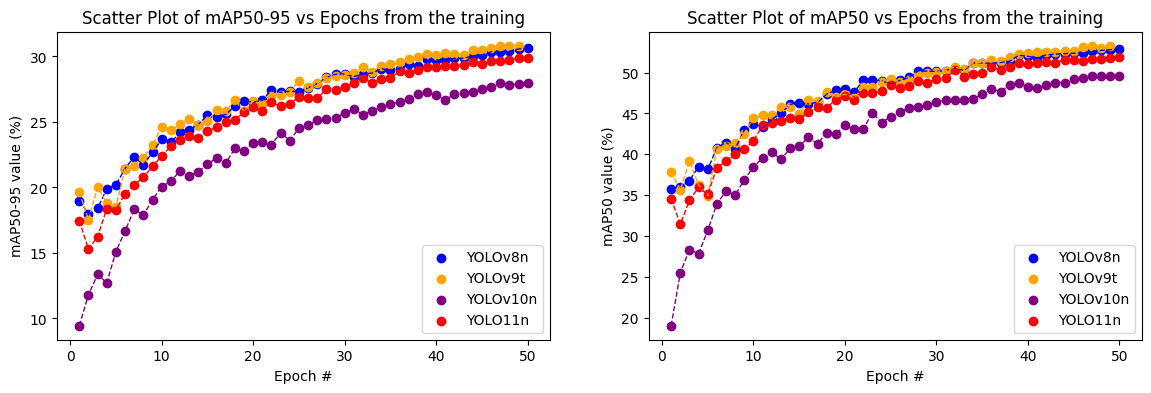

In [8]:
#defining dataframes for each model
yolov8n_results = pd.read_csv('/kaggle/working/runs/detect/yolov8n/results.csv')
yolov9t_results = pd.read_csv('/kaggle/working/runs/detect/yolov9t/results.csv')
yolov10n_results = pd.read_csv('/kaggle/working/runs/detect/yolov10n/results.csv')
yolo11n_results = pd.read_csv('/kaggle/working/runs/detect/yolo11n/results.csv')

fig, axes = plt.subplots(1, 2, figsize=(14, 4))

# creating series for each attribute
yolov8n_x_values = yolov8n_results['epoch']
yolov8n_50_95_y_values = yolov8n_results['metrics/mAP50-95(B)'] * 100
yolov8n_50_y_values = yolov8n_results['metrics/mAP50(B)'] * 100

yolov9t_x_values = yolov9t_results['epoch']
yolov9t_50_95_y_values = yolov9t_results['metrics/mAP50-95(B)'] * 100
yolov9t_50_y_values = yolov9t_results['metrics/mAP50(B)'] * 100

yolov10n_x_values = yolov10n_results['epoch']
yolov10n_50_95_y_values = yolov10n_results['metrics/mAP50-95(B)'] * 100
yolov10n_50_y_values = yolov10n_results['metrics/mAP50(B)'] * 100

yolo11n_x_values = yolo11n_results['epoch']
yolo11n_50_95_y_values = yolo11n_results['metrics/mAP50-95(B)'] * 100
yolo11n_50_y_values = yolo11n_results['metrics/mAP50(B)'] * 100

# creating the scatter plot
axes[0].scatter(yolov8n_x_values, yolov8n_50_95_y_values, c='blue', marker='o', label='YOLOv8n')
axes[0].scatter(yolov9t_x_values, yolov9t_50_95_y_values, c='orange', marker='o', label='YOLOv9t')
axes[0].scatter(yolov10n_x_values, yolov10n_50_95_y_values, c='purple', marker='o', label='YOLOv10n')
axes[0].scatter(yolo11n_x_values, yolo11n_50_95_y_values, c='red', marker='o', label='YOLO11n')

# adding the line connecting the points
axes[0].plot(yolov8n_x_values, yolov8n_50_95_y_values, c='blue', linestyle='--', linewidth=1)
axes[0].plot(yolov9t_x_values, yolov9t_50_95_y_values, c='orange', linestyle='--', linewidth=1)
axes[0].plot(yolov10n_x_values, yolov10n_50_95_y_values, c='purple', linestyle='--', linewidth=1)
axes[0].plot(yolo11n_x_values, yolo11n_50_95_y_values, c='red', linestyle='--', linewidth=1)

# adding labels, title and legend
axes[0].set_xlabel('Epoch #')
axes[0].set_ylabel('mAP50-95 value (%)')
axes[0].set_title('Scatter Plot of mAP50-95 vs Epochs from the training')
axes[0].legend()

# creating the scatter plot
axes[1].scatter(yolov8n_x_values, yolov8n_50_y_values, c='blue', marker='o', label='YOLOv8n')
axes[1].scatter(yolov9t_x_values, yolov9t_50_y_values, c='orange', marker='o', label='YOLOv9t')
axes[1].scatter(yolov10n_x_values, yolov10n_50_y_values, c='purple', marker='o', label='YOLOv10n')
axes[1].scatter(yolo11n_x_values, yolo11n_50_y_values, c='red', marker='o', label='YOLO11n')

# adding the line connecting the points
axes[1].plot(yolov8n_x_values, yolov8n_50_y_values, c='blue', linestyle='--', linewidth=1)
axes[1].plot(yolov9t_x_values, yolov9t_50_y_values, c='orange', linestyle='--', linewidth=1)
axes[1].plot(yolov10n_x_values, yolov10n_50_y_values, c='purple', linestyle='--', linewidth=1)
axes[1].plot(yolo11n_x_values, yolo11n_50_y_values, c='red', linestyle='--', linewidth=1)

# adding labels, title and legend
axes[1].set_xlabel('Epoch #')
axes[1].set_ylabel('mAP50 value (%)')
axes[1].set_title('Scatter Plot of mAP50 vs Epochs from the training')
axes[1].legend()
plt.show()

From the data in the plots, we can see that in both cases, with and without varying IoU thresholds, the best model is YOLOv9t, having a mAP50-95 of around 32% and a mAP50 of around 54%. On the other side, the worst one is clearly YOLOv10n, having a map50-95 of around 29% and a mAP50 of around 51%.

### Using best model for each version from the training

Running a validation with the test dataset on each model.

In [9]:
# Evaluate performance on test set
yolov8n_best_model = YOLO('/kaggle/working/runs/detect/yolov8n/weights/best.pt')
yolov8n_metrics = yolov8n_best_model.val(split='test')

yolov9t_best_model = YOLO('/kaggle/working/runs/detect/yolov9t/weights/best.pt')
yolov9t_metrics = yolov9t_best_model.val(split='test')

yolov10n_best_model = YOLO('/kaggle/working/runs/detect/yolov10n/weights/best.pt')
yolov10n_metrics = yolov10n_best_model.val(split='test')

yolo11n_best_model = YOLO('/kaggle/working/runs/detect/yolo11n/weights/best.pt')
yolo11n_metrics = yolo11n_best_model.val(split='test')

Ultralytics 8.3.59 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 168 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /kaggle/input/car-person-object-detection-yolov7/labels/test... 500 images, 0 backgrounds, 0 corrupt: 100%|██████████| 500/500 [00:02<00:00, 185.50it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/car-person-object-detection-yolov7/labels is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.79it/s]


                   all        500       4512      0.683      0.475      0.538      0.311
                Person        500       2646      0.706      0.465      0.538      0.313
                   Car        500       1866      0.659      0.485      0.538      0.309
Speed: 0.1ms preprocess, 3.2ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/val
Ultralytics 8.3.59 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLOv9t summary (fused): 486 layers, 1,971,174 parameters, 0 gradients, 7.6 GFLOPs


val: Scanning /kaggle/input/car-person-object-detection-yolov7/labels/test... 500 images, 0 backgrounds, 0 corrupt: 100%|██████████| 500/500 [00:00<00:00, 889.53it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/car-person-object-detection-yolov7/labels is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.44it/s]


                   all        500       4512      0.677      0.482      0.538      0.314
                Person        500       2646      0.717      0.471      0.547      0.319
                   Car        500       1866      0.638      0.493      0.528      0.309
Speed: 0.1ms preprocess, 4.1ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/val2
Ultralytics 8.3.59 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLOv10n summary (fused): 285 layers, 2,695,196 parameters, 0 gradients, 8.2 GFLOPs


val: Scanning /kaggle/input/car-person-object-detection-yolov7/labels/test... 500 images, 0 backgrounds, 0 corrupt: 100%|██████████| 500/500 [00:00<00:00, 864.33it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/car-person-object-detection-yolov7/labels is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.74it/s]


                   all        500       4512      0.667      0.449      0.513       0.29
                Person        500       2646      0.689      0.445      0.519      0.294
                   Car        500       1866      0.646      0.453      0.508      0.287
Speed: 0.1ms preprocess, 2.2ms inference, 0.0ms loss, 0.1ms postprocess per image
Results saved to runs/detect/val3
Ultralytics 8.3.59 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLO11n summary (fused): 238 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs


val: Scanning /kaggle/input/car-person-object-detection-yolov7/labels/test... 500 images, 0 backgrounds, 0 corrupt: 100%|██████████| 500/500 [00:00<00:00, 860.03it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/car-person-object-detection-yolov7/labels is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.64it/s]


                   all        500       4512      0.706      0.467      0.532      0.304
                Person        500       2646      0.756      0.463      0.544       0.31
                   Car        500       1866      0.655      0.471      0.521      0.298
Speed: 0.1ms preprocess, 1.7ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/val4


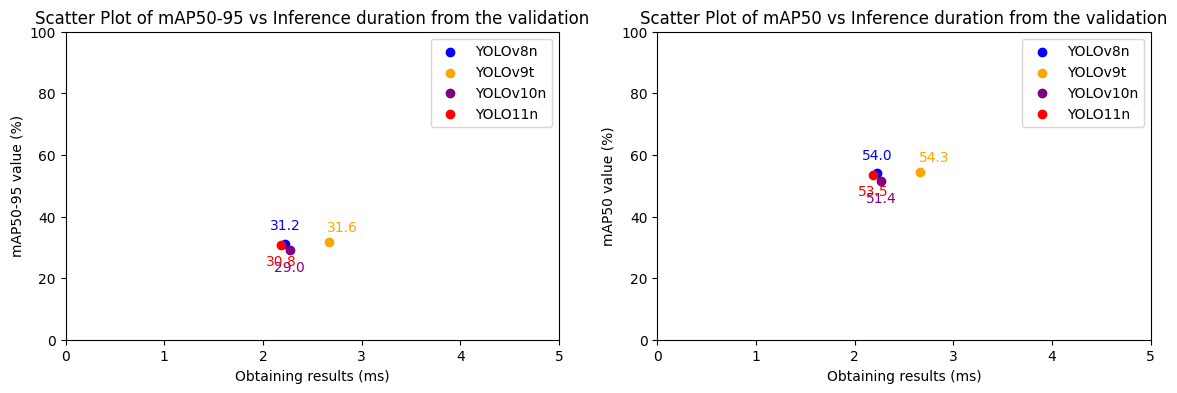

In [18]:
yolov8n_x_values = [yolov8n_metrics.speed['inference']]
yolov8n_50_95_y_values = [yolov8n_metrics.box.map*100]
yolov8n_50_y_values = [yolov8n_metrics.box.map50*100]

yolov9t_x_values = [yolov9t_metrics.speed['inference']]
yolov9t_50_95_y_values = [yolov9t_metrics.box.map*100]
yolov9t_50_y_values = [yolov9t_metrics.box.map50*100]

yolov10n_x_values = [yolov10n_metrics.speed['inference']]
yolov10n_50_95_y_values = [yolov10n_metrics.box.map*100]
yolov10n_50_y_values = [yolov10n_metrics.box.map50*100]

yolo11n_x_values = [yolo11n_metrics.speed['inference']]
yolo11n_50_95_y_values = [yolo11n_metrics.box.map*100]
yolo11n_50_y_values = [yolo11n_metrics.box.map50*100]

fig, axes = plt.subplots(1, 2, figsize=(14, 4))

# creating the scatter plot
axes[0].scatter(yolov8n_x_values, yolov8n_50_95_y_values, c='blue', marker='o', label='YOLOv8n')
axes[0].scatter(yolov9t_x_values, yolov9t_50_95_y_values, c='orange', marker='o', label='YOLOv9t')
axes[0].scatter(yolov10n_x_values, yolov10n_50_95_y_values, c='purple', marker='o', label='YOLOv10n')
axes[0].scatter(yolo11n_x_values, yolo11n_50_95_y_values, c='red', marker='o', label='YOLO11n')
axes[0].annotate(f'{yolov8n_50_95_y_values[0]:.1f}', (yolov8n_x_values[0], yolov8n_50_95_y_values[0]), textcoords="offset points", xytext=(0,10), ha='center', color='blue')
axes[0].annotate(f'{yolov9t_50_95_y_values[0]:.1f}', (yolov9t_x_values[0], yolov9t_50_95_y_values[0]), textcoords="offset points", xytext=(10,8), ha='center', color='orange')
axes[0].annotate(f'{yolov10n_50_95_y_values[0]:.1f}', (yolov10n_x_values[0], yolov10n_50_95_y_values[0]), textcoords="offset points", xytext=(0,-15), ha='center', color='purple')
axes[0].annotate(f'{yolo11n_50_95_y_values[0]:.1f}', (yolo11n_x_values[0], yolo11n_50_95_y_values[0]), textcoords="offset points", xytext=(0,-15), ha='center', color='red')

# adding labels, title and legend
axes[0].set_xlabel('Obtaining results (ms)')
axes[0].set_ylabel('mAP50-95 value (%)')
axes[0].set_xlim(left=0, right=5)
axes[0].set_ylim(bottom=0, top=100)
axes[0].set_title('Scatter Plot of mAP50-95 vs Inference duration from the validation')
axes[0].legend()

# creating the scatter plot
axes[1].scatter(yolov8n_x_values, yolov8n_50_y_values, c='blue', marker='o', label='YOLOv8n')
axes[1].scatter(yolov9t_x_values, yolov9t_50_y_values, c='orange', marker='o', label='YOLOv9t')
axes[1].scatter(yolov10n_x_values, yolov10n_50_y_values, c='purple', marker='o', label='YOLOv10n')
axes[1].scatter(yolo11n_x_values, yolo11n_50_y_values, c='red', marker='o', label='YOLO11n')
axes[1].annotate(f'{yolov8n_50_y_values[0]:.1f}', (yolov8n_x_values[0], yolov8n_50_y_values[0]), textcoords="offset points", xytext=(0,10), ha='center', color='blue')
axes[1].annotate(f'{yolov9t_50_y_values[0]:.1f}', (yolov9t_x_values[0], yolov9t_50_y_values[0]), textcoords="offset points", xytext=(10,8), ha='center', color='orange')
axes[1].annotate(f'{yolov10n_50_y_values[0]:.1f}', (yolov10n_x_values[0], yolov10n_50_y_values[0]), textcoords="offset points", xytext=(0,-15), ha='center', color='purple')
axes[1].annotate(f'{yolo11n_50_y_values[0]:.1f}', (yolo11n_x_values[0], yolo11n_50_y_values[0]), textcoords="offset points", xytext=(0,-15), ha='center', color='red')

# adding labels, title and legend
axes[1].set_xlabel('Obtaining results (ms)')
axes[1].set_ylabel('mAP50 value (%)')
axes[1].set_xlim(left=0, right=5)
axes[1].set_ylim(bottom=0, top=100)
axes[1].set_title('Scatter Plot of mAP50 vs Inference duration from the validation')
axes[1].legend()
plt.show()

We can see that all the models take around 2 to 3 miliseconds for the inference, which shows the real speed that they have. It seems that even if the YOLOv9t is the best when it comes to the accuracy, it is the slowest.

### Testing the models on random images from the test dataset

Analying how they perform in comparison with eachother.


0: 288x416 3 Persons, 2 Cars, 4.8ms
Speed: 7.1ms preprocess, 4.8ms inference, 2.1ms postprocess per image at shape (1, 3, 288, 416)

0: 288x416 3 Persons, 2 Cars, 11.5ms
Speed: 0.7ms preprocess, 11.5ms inference, 0.8ms postprocess per image at shape (1, 3, 288, 416)

0: 288x416 1 Person, 1 Car, 7.9ms
Speed: 0.8ms preprocess, 7.9ms inference, 0.4ms postprocess per image at shape (1, 3, 288, 416)

0: 288x416 3 Persons, 1 Car, 6.0ms
Speed: 0.9ms preprocess, 6.0ms inference, 0.8ms postprocess per image at shape (1, 3, 288, 416)


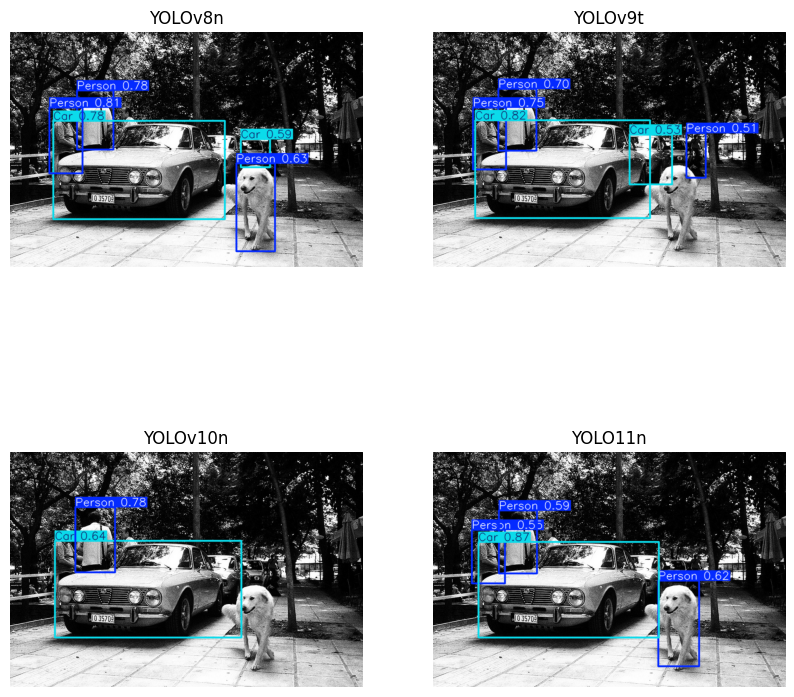


0: 256x416 2 Persons, 2 Cars, 5.6ms
Speed: 0.6ms preprocess, 5.6ms inference, 0.8ms postprocess per image at shape (1, 3, 256, 416)

0: 256x416 2 Persons, 2 Cars, 13.6ms
Speed: 1.0ms preprocess, 13.6ms inference, 0.8ms postprocess per image at shape (1, 3, 256, 416)

0: 256x416 2 Persons, 2 Cars, 8.0ms
Speed: 1.3ms preprocess, 8.0ms inference, 0.4ms postprocess per image at shape (1, 3, 256, 416)

0: 256x416 2 Persons, 2 Cars, 7.6ms
Speed: 0.7ms preprocess, 7.6ms inference, 1.6ms postprocess per image at shape (1, 3, 256, 416)


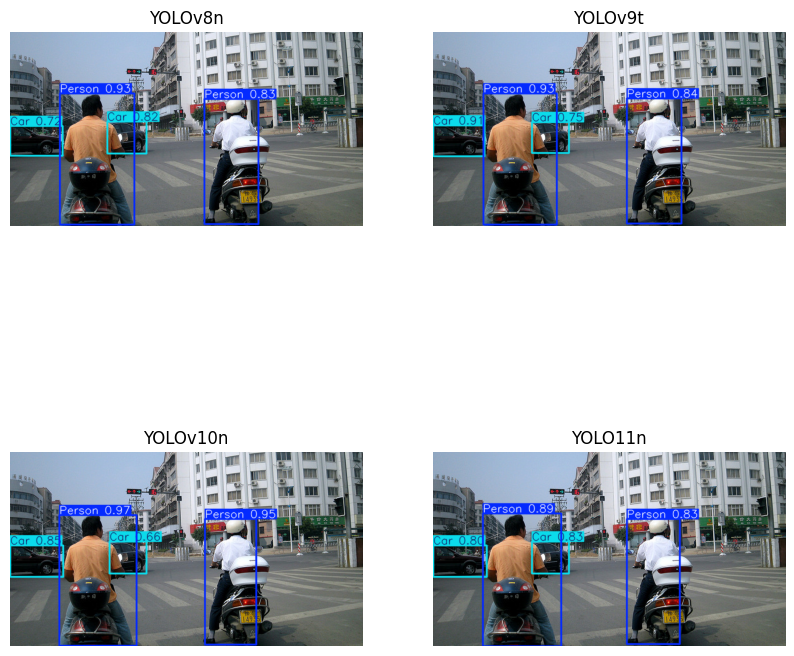


0: 320x416 1 Person, 1 Car, 6.2ms
Speed: 1.1ms preprocess, 6.2ms inference, 0.8ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 1 Person, 1 Car, 15.8ms
Speed: 0.9ms preprocess, 15.8ms inference, 2.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 1 Person, 1 Car, 9.2ms
Speed: 1.3ms preprocess, 9.2ms inference, 0.3ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 2 Persons, 1 Car, 6.9ms
Speed: 1.0ms preprocess, 6.9ms inference, 0.9ms postprocess per image at shape (1, 3, 320, 416)


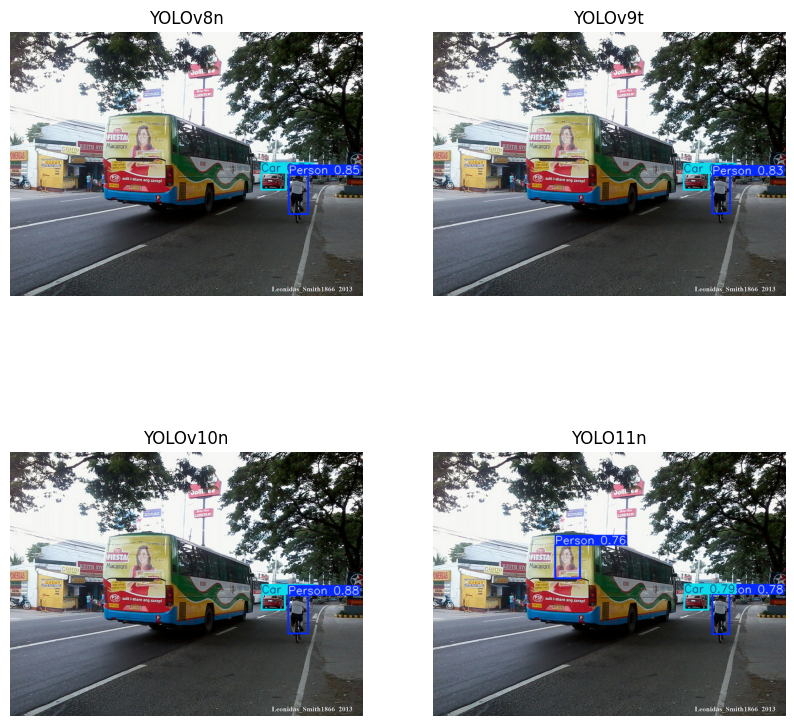


0: 288x416 1 Person, 3 Cars, 6.3ms
Speed: 1.3ms preprocess, 6.3ms inference, 1.1ms postprocess per image at shape (1, 3, 288, 416)

0: 288x416 1 Person, 1 Car, 13.5ms
Speed: 0.8ms preprocess, 13.5ms inference, 1.2ms postprocess per image at shape (1, 3, 288, 416)

0: 288x416 3 Cars, 11.4ms
Speed: 1.0ms preprocess, 11.4ms inference, 0.4ms postprocess per image at shape (1, 3, 288, 416)

0: 288x416 2 Persons, 3 Cars, 7.1ms
Speed: 0.8ms preprocess, 7.1ms inference, 1.3ms postprocess per image at shape (1, 3, 288, 416)


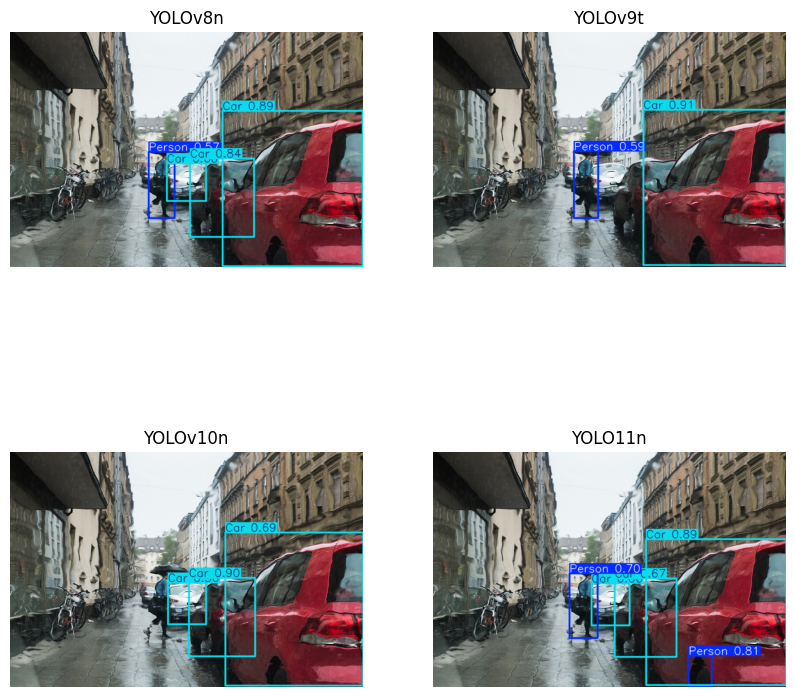


0: 320x416 1 Car, 4.9ms
Speed: 0.8ms preprocess, 4.9ms inference, 0.9ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 1 Car, 14.1ms
Speed: 0.9ms preprocess, 14.1ms inference, 1.2ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 2 Cars, 10.7ms
Speed: 1.1ms preprocess, 10.7ms inference, 0.4ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 1 Car, 7.6ms
Speed: 0.7ms preprocess, 7.6ms inference, 1.5ms postprocess per image at shape (1, 3, 320, 416)


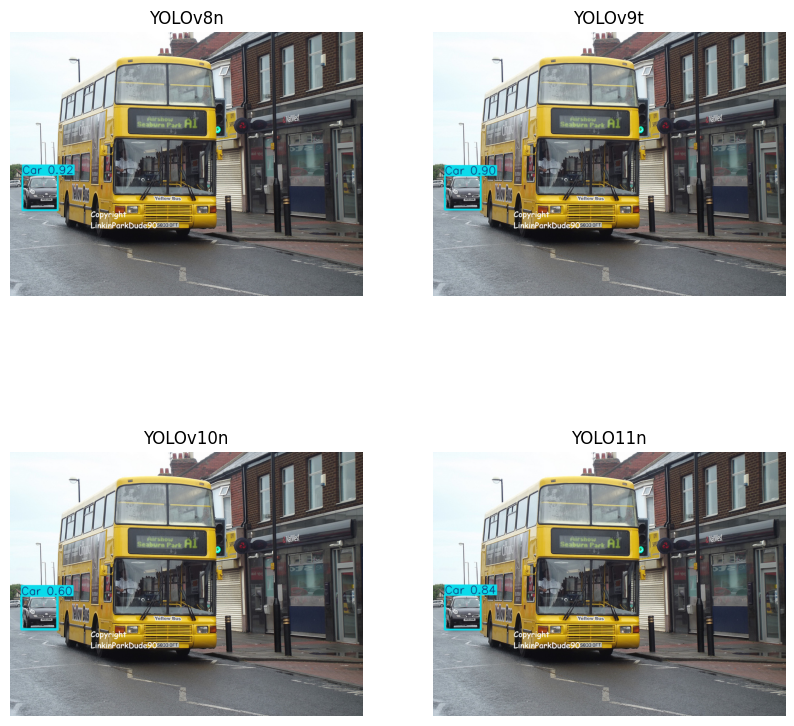

In [24]:
# Directory paths
image_dir = test_path

# Get test images
image_files = [os.path.join(image_dir, file) for file in os.listdir(image_dir) if file.endswith('.jpg')]
random_images = random.sample(image_files, k=5)

def predict_image_with_output(model_name, model, image_np, ax):
    # Predict
    image_prediction = model.predict(
        [image_np],
        imgsz=416,
        conf=0.5,  # Confidence threshold
        iou=0.6  # IOU threshold
    )
    for result in image_prediction:
        plot = result.plot()
        plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
        ax.imshow(plot)
        ax.axis('off')
        ax.set_title(model_name)
    return image_prediction

# Predict and display results
for image_path in random_images:
    image = Image.open(image_path).convert('RGB')  # Open image
    image_np = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)  # Convert to OpenCV format
    fig, axes = plt.subplots(2, 2, figsize=(10, 10))
    predict_image_with_output('YOLOv8n', yolov8n_best_model, image_np, axes[0, 0])
    predict_image_with_output('YOLOv9t', yolov9t_best_model, image_np, axes[0, 1])
    predict_image_with_output('YOLOv10n', yolov10n_best_model, image_np, axes[1, 0])
    predict_image_with_output('YOLO11n', yolo11n_best_model, image_np, axes[1, 1])
    plt.show()

It is interesting to see in the above 5 random images some different environments which may influence the results.

Some key takeaways:
* The precision for each prediction it really ranges from 0.5 to 1, each model being all over this range.
* Some models detect that a dog is a person, which is somehow funny.
* Some of the models struggle with the distorsion like the rainy windshield, predicting that the wheel is a person, some of the models not even recognizing the person and all the cars.

### Running a prediction on a video

A new video is also saved at 'output_filename' location.

In [ ]:
# defining function for creating a writer (for mp4 videos)
def create_video_writer(video_cap, output_filename):
    # grab the width, height, and fps of the frames in the video stream.
    frame_width = int(video_cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(video_cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = int(video_cap.get(cv2.CAP_PROP_FPS))
    # initialize the FourCC and a video writer object
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    writer = cv2.VideoWriter(output_filename, fourcc, fps,
                             (frame_width, frame_height))
    return writer

# Open the video file
video_path = "./TestVideo/Timisoara_Object_Detection.mp4"
cap = cv2.VideoCapture(video_path)

output_filename = "./TestVideo/Timisoara_Object_Detection_YOLOv9t.mp4"
writer = create_video_writer(cap, output_filename)

# Loop through the video frames
while cap.isOpened():
    # Read a frame from the video
    success, frame = cap.read()

    if success:
        # Run YOLO inference on the frame
        results = yolov9t_best_model.predict(
            frame,
            imgsz=416,
            conf=0.5,  # Confidence threshold
            iou=0.6,  # IOU threshold
            show=False # Do not display results 2 times
            )

        # Visualize the results on the frame
        annotated_frame = results[0].plot()
        writer.write(annotated_frame)

        # Display the annotated frame
        cv2.imshow("YOLO Inference", annotated_frame)

        # Break the loop if 'q' is pressed
        if cv2.waitKey(1) & 0xFF == ord("q"):
            break
    else:
        # Break the loop if the end of the video is reached
        break

# Release the video capture object and close the display window
cap.release()
writer.release()
cv2.destroyAllWindows()

In [14]:
HTML('<iframe width="790" height="440" src="https://www.youtube.com/embed/ISbym1iijM4?si=FIWXmwNnTODaXQ-1" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>')

As seen in the video, the model predicts very well the cars and persons.
Two interesting observations are that:
* it does not predict children as persons
* it has a hard time understanding frames with lots of background colors (last part of the video)

### Conclusions

YOLO seems to really perform, all of the models making predictions in miliseconds.

The best model from all tried above is YOLOv9t, but is also the slowest, with a margin of nanoseconds.

The worst model seems to be YOLOv10n for this dataset.

In the end, each model seems to have its strongs and weaks, performing in different circumstances, some of them detect that a dog is a person and some of them fail to predict when an image is distorted, but overall in my opinion they all performed really well for what was expected.

### Bibliography

The text information is marked with a link to the source at the end of each paragraph.

For the code, I had inspiration from:
* https://www.kaggle.com/code/mohmdhmedi/object-detection-with-yolov8/notebook
* https://medium.com/@Mert.A/how-to-use-yolov10-for-object-detection-de9f47898db2
* https://docs.ultralytics.com/tasks/

Dataset:
* https://www.kaggle.com/datasets/mdiqbalbajmi/car-person-object-detection-yolov7

Thank you for the read!